## Playing around with datasets, part 1:

In [1]:
# import libraries
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dt_lst = ['EXTR_RPSale.csv', 'EXTR_ResBldg.csv', 'EXTR_Parcel.csv', 'EXTR_LookUp.csv']
dfs = {}

In [3]:
path_to_raw = os.path.join('..', '..', 'data', 'raw')
for f in dt_lst:
    f_key = f[5:-4]
    dfs[f_key] = pd.read_csv(os.path.join(path_to_raw, f), dtype='str')

Create a function that removes trailing whitespace in datasets

In [4]:
def strip_ws(dt):
    dt = dt.applymap(lambda x: x.strip() if type(x) == str else x)
    return dt

### RPSale

In [5]:
dfs['RPSale'].head()

ExciseTaxNbr   Major Minor DocumentDate SalePrice    RecordingNbr Volume  \
0      2857854  198920  1430   03/28/2017         0  20170410000541          
1      2743355  638580  0110   07/14/2015    190000  20150715002686          
2      2999169  919715  0200   07/08/2019    192000  20190712001080          
3      2841697  894677  0240   12/21/2016    818161  20161228000896          
4      2826129  445872  0260   10/03/2016         0  20161004000511          

  Page PlatNbr PlatType  ... PropertyType PrincipalUse SaleInstrument  \
0                        ...            3            7             15   
1                        ...            3            6              3   
2                        ...            3            2              3   
3                        ...            2            6              3   
4                        ...            3            2             15   

  AFForestLand AFCurrentUseLand AFNonProfitUse AFHistoricProperty SaleReason  \
0            N                N              N                  N         16   
1            N                N              N                  N          1   
2            N                N              N                  N          1   
3            N                N              N                  N          1   
4            N                N              N                  N         18   

  PropertyClass SaleWarning  
0             2       20 31  
1             8          15  
2             3              
3             8              
4             3       18 31  

[5 rows x 24 columns]

In [6]:
dfs['RPSale'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351067 entries, 0 to 351066
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ExciseTaxNbr        351067 non-null  object
 1   Major               351067 non-null  object
 2   Minor               351067 non-null  object
 3   DocumentDate        351067 non-null  object
 4   SalePrice           351067 non-null  object
 5   RecordingNbr        351067 non-null  object
 6   Volume              351067 non-null  object
 7   Page                351067 non-null  object
 8   PlatNbr             351067 non-null  object
 9   PlatType            351067 non-null  object
 10  PlatLot             351067 non-null  object
 11  PlatBlock           351067 non-null  object
 12  SellerName          351067 non-null  object
 13  BuyerName           351067 non-null  object
 14  PropertyType        351067 non-null  object
 15  PrincipalUse        351067 non-null  object
 16  Sa

In [7]:
# Check null values
dfs['RPSale'].isna().sum()

ExciseTaxNbr          0
Major                 0
Minor                 0
DocumentDate          0
SalePrice             0
RecordingNbr          0
Volume                0
Page                  0
PlatNbr               0
PlatType              0
PlatLot               0
PlatBlock             0
SellerName            0
BuyerName             0
PropertyType          0
PrincipalUse          0
SaleInstrument        0
AFForestLand          0
AFCurrentUseLand      0
AFNonProfitUse        0
AFHistoricProperty    0
SaleReason            0
PropertyClass         0
SaleWarning           0
dtype: int64

Identify potential columns of interest in the 'RPSale' dataset, and convert them to the appropriate data type.

In [8]:
rpsale_cols = ['SalePrice', 'ExciseTaxNbr', 'Major', 'Minor', 'DocumentDate', 
               'RecordingNbr', 'PropertyType', 'PropertyClass']

In [9]:
rpsale_df = strip_ws(dfs['RPSale'][rpsale_cols].copy())
rpsale_df.SalePrice = rpsale_df.SalePrice.astype(int)

In [10]:
# Convert DocumentDate column to datetime object
from datetime import datetime

rpsale_df['DocumentDate'] = pd.to_datetime(rpsale_df.DocumentDate, infer_datetime_format=True)

# Create another column that stores only year value
rpsale_df['Year'] = rpsale_df['DocumentDate'].dt.year

In [11]:
# Only keep entries with year == 2019
rpsale_df = rpsale_df[rpsale_df.Year == 2019]

In [12]:
# Remove all entries with SalePrice <= 0
rpsale_df = rpsale_df[rpsale_df.SalePrice > 0]

In [13]:
rpsale_df.head()

SalePrice ExciseTaxNbr   Major Minor DocumentDate    RecordingNbr  \
2      192000      2999169  919715  0200   2019-07-08  20190712001080   
8      185000      3000673  894444  0200   2019-06-26  20190722001395   
9      560000      3027422  213043  0120   2019-12-20  20191226000848   
10     435000      3002257  940652  0630   2019-07-22  20190730001339   
19    7600000      3018109  152504  9008   2019-10-18  20191030001615   

   PropertyType PropertyClass  Year  
2             3             3  2019  
8             3             3  2019  
9            11             8  2019  
10           11             8  2019  
19            3             2  2019

In [14]:
rpsale_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41779 entries, 2 to 351057
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   SalePrice      41779 non-null  int64         
 1   ExciseTaxNbr   41779 non-null  object        
 2   Major          41779 non-null  object        
 3   Minor          41779 non-null  object        
 4   DocumentDate   41779 non-null  datetime64[ns]
 5   RecordingNbr   41779 non-null  object        
 6   PropertyType   41779 non-null  object        
 7   PropertyClass  41779 non-null  object        
 8   Year           41779 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 3.2+ MB


### ResBldg

In [15]:
dfs['ResBldg'].head(3)

Major Minor BldgNbr NbrLivingUnits                     Address  \
0  009800  0720       1              1  27719  SE 26TH WAY   98075   
1  009802  0140       1              1  2829   277TH TER SE  98075   
2  009830  0020       1              1  1715   298TH CRESENT  SE     

  BuildingNumber Fraction DirectionPrefix                 StreetName  \
0          27719                       SE  26TH                        
1          2829                            277TH                       
2          1715                            298TH CRESENT               

  StreetType  ... FpMultiStory FpFreestanding FpAdditional YrBuilt  \
0     WAY     ...            0              0            0    2001   
1     TER     ...            0              0            0    2004   
2             ...            0              0            0    2017   

  YrRenovated PcntComplete Obsolescence PcntNetCondition Condition AddnlCost  
0           0            0            0                0         3         0  
1           0            0            0                0         3         0  
2           0            0            0                0         3         0  

[3 rows x 50 columns]

In [16]:
dfs['ResBldg'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181510 entries, 0 to 181509
Data columns (total 50 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Major               181510 non-null  object
 1   Minor               181510 non-null  object
 2   BldgNbr             181510 non-null  object
 3   NbrLivingUnits      181510 non-null  object
 4   Address             181510 non-null  object
 5   BuildingNumber      181510 non-null  object
 6   Fraction            181510 non-null  object
 7   DirectionPrefix     181146 non-null  object
 8   StreetName          181510 non-null  object
 9   StreetType          181510 non-null  object
 10  DirectionSuffix     181146 non-null  object
 11  ZipCode             154594 non-null  object
 12  Stories             181510 non-null  object
 13  BldgGrade           181510 non-null  object
 14  BldgGradeVar        181510 non-null  object
 15  SqFt1stFloor        181510 non-null  object
 16  Sq

In [17]:
# Check Null values
dfs['ResBldg'].isna().sum().sort_values(ascending=False)[:5]

ZipCode            26916
DirectionPrefix      364
DirectionSuffix      364
Major                  0
BathFullCount          0
dtype: int64

Similar to 'RPSale', I've identified potential columns of interest in 'ResBldg' to focus on first. Since this dataset has more columns, we will do this by dropping columns that might not be directly relevant at this stage.

In [18]:
to_drop = ['BuildingNumber', 'Fraction', 'DirectionPrefix', 'StreetName', 
           'StreetType', 'DirectionSuffix', 'ZipCode', 'BldgGradeVar']

resbldg_df = dfs['ResBldg'].drop(to_drop, axis=1)

In [19]:
resbldg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181510 entries, 0 to 181509
Data columns (total 42 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Major               181510 non-null  object
 1   Minor               181510 non-null  object
 2   BldgNbr             181510 non-null  object
 3   NbrLivingUnits      181510 non-null  object
 4   Address             181510 non-null  object
 5   Stories             181510 non-null  object
 6   BldgGrade           181510 non-null  object
 7   SqFt1stFloor        181510 non-null  object
 8   SqFtHalfFloor       181510 non-null  object
 9   SqFt2ndFloor        181510 non-null  object
 10  SqFtUpperFloor      181510 non-null  object
 11  SqFtUnfinFull       181510 non-null  object
 12  SqFtUnfinHalf       181510 non-null  object
 13  SqFtTotLiving       181510 non-null  object
 14  SqFtTotBasement     181510 non-null  object
 15  SqFtFinBasement     181510 non-null  object
 16  Fi

We can also convert some columns into integer/float

In [20]:
resbldg_int = ['NbrLivingUnits', 'Bedrooms'] + \
              [c for c in resbldg_df.columns if 'sqft' in c.lower() or 'count' in c.lower()] + \
              ['BrickStone', 'PcntComplete', 'PcntNetCondition', 'YrBuilt', 'YrRenovated', 'AddnlCost']
resbldg_fl = ['Stories']

In [21]:
for c in resbldg_int:
    resbldg_df[c] = resbldg_df[c].astype(int)
for c in resbldg_fl:
    resbldg_df[c] = resbldg_df[c].astype(float)

In [22]:
resbldg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181510 entries, 0 to 181509
Data columns (total 42 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Major               181510 non-null  object 
 1   Minor               181510 non-null  object 
 2   BldgNbr             181510 non-null  object 
 3   NbrLivingUnits      181510 non-null  int64  
 4   Address             181510 non-null  object 
 5   Stories             181510 non-null  float64
 6   BldgGrade           181510 non-null  object 
 7   SqFt1stFloor        181510 non-null  int64  
 8   SqFtHalfFloor       181510 non-null  int64  
 9   SqFt2ndFloor        181510 non-null  int64  
 10  SqFtUpperFloor      181510 non-null  int64  
 11  SqFtUnfinFull       181510 non-null  int64  
 12  SqFtUnfinHalf       181510 non-null  int64  
 13  SqFtTotLiving       181510 non-null  int64  
 14  SqFtTotBasement     181510 non-null  int64  
 15  SqFtFinBasement     181510 non-nul

### Parcel

In [23]:
dfs['Parcel'].head(3)

Unnamed: 0   Major Minor PropName                            PlatName  \
0          0  807841  0410                      SUMMER RIDGE DIV NO. 02   
1          2  755080  0015           SANDER'S TO GILMAN PK & SALMON BAY   
2          3  888600  0135                           VASHON GARDENS ADD   

          PlatLot PlatBlock Range Township Section  ... SeismicHazard  \
0  41                           6       25      22  ...             N   
1  3                1           3       25      11  ...             N   
2  21                           3       22       8  ...             N   

  LandslideHazard SteepSlopeHazard Stream Wetland SpeciesOfConcern  \
0               N                N      N       N                N   
1               N                N      N       N                N   
2               N                N      N       N                N   

  SensitiveAreaTract WaterProblems TranspConcurrency OtherProblems  
0                  N             N                 N             N  
1                  N             N                 N             N  
2                  N             N                 N             N  

[3 rows x 82 columns]

In [24]:
# Check null values
dfs['Parcel'].isna().sum().sort_values(ascending=False)[:10]

SpecArea                 200335
SpecSubArea              200335
PlatName                  28545
PropName                   9111
Area                          6
SubArea                       6
CurrentUseDesignation         0
HistoricSite                  0
AdjacentGreenbelt             0
AdjacentGolfFairway           0
dtype: int64

Drop the `Unnamed: 0` column:

In [25]:
dfs['Parcel'].drop(['Unnamed: 0'], axis=1, inplace=True)

In [26]:
# Check null values again
dfs['Parcel'].isna().sum().sort_values(ascending=False)[:10]

SpecSubArea              200335
SpecArea                 200335
PlatName                  28545
PropName                   9111
SubArea                       6
Area                          6
CurrentUseDesignation         0
HistoricSite                  0
AdjacentGreenbelt             0
AdjacentGolfFairway           0
dtype: int64

In [27]:
dfs['Parcel'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205199 entries, 0 to 205198
Data columns (total 81 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Major                   205199 non-null  object
 1   Minor                   205199 non-null  object
 2   PropName                196088 non-null  object
 3   PlatName                176654 non-null  object
 4   PlatLot                 205199 non-null  object
 5   PlatBlock               205199 non-null  object
 6   Range                   205199 non-null  object
 7   Township                205199 non-null  object
 8   Section                 205199 non-null  object
 9   QuarterSection          205199 non-null  object
 10  PropType                205199 non-null  object
 11  Area                    205193 non-null  object
 12  SubArea                 205193 non-null  object
 13  SpecArea                4864 non-null    object
 14  SpecSubArea             4864 non-nul

Identify columns that might be potentially more relevant to our project

In [28]:
parcel_cols = ['Major', 'Minor', 'PropType', 'DistrictName', 'SqFtLot', 'WaterSystem', 'SewerSystem',
               'StreetSurface', 'RestrictiveSzShape', 'InadequateParking', 'PcntUnusable', 'Unbuildable',
               'LotDepthFactor', 'TrafficNoise', 'AirportNoise', 'NbrBldgSites', 'Contamination', 'WaterProblems']

In [29]:
parcel_df = dfs['Parcel'][parcel_cols].copy()
parcel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205199 entries, 0 to 205198
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Major               205199 non-null  object
 1   Minor               205199 non-null  object
 2   PropType            205199 non-null  object
 3   DistrictName        205199 non-null  object
 4   SqFtLot             205199 non-null  object
 5   WaterSystem         205199 non-null  object
 6   SewerSystem         205199 non-null  object
 7   StreetSurface       205199 non-null  object
 8   RestrictiveSzShape  205199 non-null  object
 9   InadequateParking   205199 non-null  object
 10  PcntUnusable        205199 non-null  object
 11  Unbuildable         205199 non-null  object
 12  LotDepthFactor      205199 non-null  object
 13  TrafficNoise        205199 non-null  object
 14  AirportNoise        205199 non-null  object
 15  NbrBldgSites        205199 non-null  object
 16  Co

In [30]:
parcel_df.head()

Major Minor PropType DistrictName SqFtLot WaterSystem SewerSystem  \
0  807841  0410        R    SAMMAMISH    7424           2           2   
1  755080  0015        R      SEATTLE    5000           2           2   
2  888600  0135        R  KING COUNTY  277041           2           1   
3  022603  9181        R    SHORELINE   10560           2           2   
4  229670  0160        R     KIRKLAND    9853           2           2   

  StreetSurface RestrictiveSzShape InadequateParking PcntUnusable Unbuildable  \
0             1                  0                 0            0       False   
1             1                  0                 0            0       False   
2             1                  0                 2            0       False   
3             1                  0                 0            0       False   
4             1                  0                 2            0       False   

  LotDepthFactor TrafficNoise AirportNoise NbrBldgSites Contamination  \
0              0            0            0            0             0   
1              0            0            0            0             0   
2              0            0            0            0             0   
3              0            0            0            0             0   
4              0            0            0            0             0   

  WaterProblems  
0             N  
1             N  
2             N  
3             N  
4             N

### LookUp

In [31]:
dfs['LookUp'].head()

LUType LUItem                                      LUDescription
0    1      1    LAND ONLY                                     ...
1    1      10   Land with new building                        ...
2    1      11   Household, single family units                ...
3    1      12   Multiple family residence (Residential, 2-4 un...
4    1      13   Multiple family residence (Residential, 5+ uni...

In [32]:
# HeatSystem LookUp Type Code is 108
dfs['LookUp'][dfs['LookUp'].LUType == '108']

LUType LUItem                                      LUDescription
243    108    1    Floor-Wall                                    ...
244    108    2    Gravity                                       ...
245    108    3    Radiant                                       ...
246    108    4    Elec BB                                       ...
247    108    5    Forced Air                                    ...
248    108    6    Hot Water                                     ...
249    108    7    Heat Pump                                     ...
250    108    8    Other                                         ...

In [33]:
dfs['LookUp'][dfs['LookUp'].LUType == '1']

Empty DataFrame
Columns: [LUType, LUItem, LUDescription]
Index: []

In [34]:
dfs['LookUp'][dfs['LookUp'].LUType == '1  ']

LUType LUItem                                      LUDescription
0     1      1    LAND ONLY                                     ...
1     1      10   Land with new building                        ...
2     1      11   Household, single family units                ...
3     1      12   Multiple family residence (Residential, 2-4 un...
4     1      13   Multiple family residence (Residential, 5+ uni...
..    ...    ...                                                ...
79    1      93   Water areas                                   ...
80    1      94   Open space land classified under chapter 84.34...
81    1      95   Timberland classified under chapter 84.34 RCW ...
82    1      96   Improvements on leased land                   ...
83    1      99   Other undeveloped land                        ...

[84 rows x 3 columns]

Some values in `LUType` and `LUItem` in the LookUp dataframe seem to have trailing whitespaces, which makes it tricky to look up the information. I thus would remove these trailing whitespaces.

In [35]:
lookup_df = strip_ws(dfs['LookUp'])

In [36]:
lookup_df[lookup_df.LUType == '1']

LUType LUItem                                      LUDescription
0       1      1                                          LAND ONLY
1       1     10                             Land with new building
2       1     11                     Household, single family units
3       1     12  Multiple family residence (Residential, 2-4 un...
4       1     13  Multiple family residence (Residential, 5+ units)
..    ...    ...                                                ...
79      1     93                                        Water areas
80      1     94  Open space land classified under chapter 84.34...
81      1     95      Timberland classified under chapter 84.34 RCW
82      1     96                        Improvements on leased land
83      1     99                             Other undeveloped land

[84 rows x 3 columns]

It might be beneficial to create a lookup function to speed up the look-up process, especially during the initial exploratory analysis of the dataset. 

In [37]:
def lookup(lu_type, lu_item=None):
    """
    return a dataframe from 'lookup_df' with 'LUType' == lu_type
    and 'LUItem' == lu_item (if specified)
    """
    if lu_item:
        return lookup_df[(lookup_df.LUType == str(lu_type)) & (lookup_df.LUItem == str(lu_item))]
    else:
        return lookup_df[(lookup_df.LUType == str(lu_type))]

## Merging datasets

Before merging datasets, I will create a shared column for all 3 datasets `['RPSale', 'ResBldg', 'Parcel']`, called `"PIN"` which is the concatenation of the `"Major"` and `"Minor"` columns. 

I will also drop `"Major"` and `"Minor"` columns in 3 datasets to remove duplicated information:

In [38]:
for dt in [rpsale_df, resbldg_df, parcel_df]:
    dt['PIN'] = dt.Major + dt.Minor
    dt.drop(['Major', 'Minor'], axis=1, inplace=True)

In [39]:
resbldg_df.PIN.value_counts()

0822119001    21
2722059164    19
5119400095    13
0114100979    11
9352900035     8
              ..
2591020180     1
3306700030     1
1796370050     1
2492200415     1
7809680070     1
Name: PIN, Length: 179476, dtype: int64

In [40]:
round(len(resbldg_df.PIN.value_counts()[resbldg_df.PIN.value_counts() > 1]) / len(resbldg_df),3) * 100

0.8999999999999999

So, currently the number of rows with duplicated PIN values in our `'ResBldg'` dataset is 1717, which is approximately 0.8999% of the total number of data points in the dataset. In the grand scheme of thing, trimming down some of these entries to make the merging faster might be the better choice rather than trying to match entries in `'RPSale'` and `'ResBldg'`.

First, I picked out the PIN value with highest count to test how many times it appears in each dataset. 

In [41]:
testpin = '0822119001'

In [42]:
test_rpsale = rpsale_df[rpsale_df.PIN == testpin]
test_rpsale

SalePrice ExciseTaxNbr DocumentDate    RecordingNbr PropertyType  \
189866      70000      3017542   2019-10-21  20191028001102            0   
192146      70000      3017076   2019-10-21                            3   
309734      70000      3017115   2019-10-21  20191025000752            0   

       PropertyClass  Year         PIN  
189866             8  2019  0822119001  
192146             8  2019  0822119001  
309734             8  2019  0822119001

There're 3 entries in 'RPSale' with the same PIN value in 2019. These transactions were sold/documented on the exact same date, at the exact same price.

In [43]:
test_resbldg = resbldg_df[resbldg_df.PIN == testpin]
test_resbldg[['Address', 'BldgNbr', 'Stories', 'SqFtTotLiving', 'Bedrooms',
              'BathFullCount', 'SqFtGarageBasement', 'HeatSystem', 'YrBuilt']]

Address BldgNbr  Stories  SqFtTotLiving  Bedrooms  \
59918  20904   677TH PL SE  98045      20      1.0            340         0   
59919  20904   677TH PL SE  98045       1      1.0            430         0   
59920  20904   677TH PL SE  98045      14      1.0            320         0   
59921  20904   677TH PL SE  98045      17      1.0            430         0   
59922  20904   677TH PL SE  98045       5      1.5            810         0   
59923  20904   677TH PL SE  98045      15      1.5            620         0   
59924  20904   677TH PL SE  98045      11      1.0            330         0   
59925  20904   677TH PL SE  98045       9      1.0            480         0   
59926  20904   677TH PL SE  98045      12      1.0            300         0   
59927  20904   677TH PL SE  98045      13      1.5            590         0   
59928  20904   677TH PL SE  98045      19      1.0            380         0   
59929  20904   677TH PL SE  98045       2      1.0            190         0   
59930  20904   677TH PL SE  98045      16      1.5            650         0   
59931  20904   677TH PL SE  98045      21      1.0            270         0   
59932  20904   677TH PL SE  98045       4      1.0            300         0   
59933  20904   677TH PL SE  98045       3      1.5            490         0   
59934  20904   677TH PL SE  98045      18      1.0            680         0   
59935  20904   677TH PL SE  98045       7      1.5            820         0   
59936  20904   677TH PL SE  98045      10      1.0            390         0   
59937  20904   677TH PL SE  98045       6      1.0            420         0   
59938  20904   677TH PL SE  98045       8      1.0            380         0   

       BathFullCount  SqFtGarageBasement HeatSystem  YrBuilt  
59918              0                   0          0     1940  
59919              0                   0          0     1957  
59920              0                   0          0     1940  
59921              0                   0          0     1946  
59922              0                   0          0     1940  
59923              0                   0          0     1950  
59924              0                   0          0     1940  
59925              0                   0          0     1957  
59926              0                   0          0     1959  
59927              0                   0          0     1940  
59928              0                   0          0     1940  
59929              0                   0          0     1940  
59930              0                   0          0     1940  
59931              0                   0          0     1946  
59932              0                   0          0     1957  
59933              0                   0          0     1957  
59934              0                   0          0     1959  
59935              0                   0          0     1959  
59936              0                   0          0     1940  
59937              0                   0          0     1940  
59938              0                   0          0     1940

In [44]:
test_resbldg[['SqFtTotLiving', 'YrBuilt', 'BathFullCount']].describe()

SqFtTotLiving      YrBuilt  BathFullCount
count      21.000000    21.000000           21.0
mean      458.095238  1947.000000            0.0
std       175.003401     8.312641            0.0
min       190.000000  1940.000000            0.0
25%       330.000000  1940.000000            0.0
50%       420.000000  1940.000000            0.0
75%       590.000000  1957.000000            0.0
max       820.000000  1959.000000            0.0

In [45]:
test_resbldg.BldgNbr.value_counts()

20    1
7     1
11    1
6     1
19    1
14    1
15    1
1     1
2     1
3     1
16    1
18    1
10    1
9     1
12    1
4     1
8     1
13    1
21    1
5     1
17    1
Name: BldgNbr, dtype: int64

There are currently 21 entries with the same PIN in the 'ResBldg' dataset. Comparing these rows, I can see that they do share a decent amount of information: 
- They have the **exact same Address**
- `'SqFtTotLiving'` is mostly in the same range of [330, 590] with some outliers, the same goes for `'YrBuilt'` (with the mode being `1940`). 
- Other than that, `'Bedrooms'` and `BathFullCount'` are pretty much the same (`0`) throughout 21 entries.
- The only major difference is `'BldgNbr'`, which probably refers to each unit's number within that same lot/parcel.

In [46]:
test_parcel = parcel_df[parcel_df.PIN == testpin]
test_parcel

PropType DistrictName   SqFtLot WaterSystem SewerSystem StreetSurface  \
46768        R  KING COUNTY  23305249           0           0             1   

      RestrictiveSzShape InadequateParking PcntUnusable Unbuildable  \
46768                  0                 2            0       False   

      LotDepthFactor TrafficNoise AirportNoise NbrBldgSites Contamination  \
46768              0            2            0            0             0   

      WaterProblems         PIN  
46768             N  0822119001

There're only 1 entry in `'Parcel'` with the same PIN, which is understandable, since `'PIN'` is the unique value of this dataset. We can see that this parcel is 23305249 sqft, which would definitely be enough for 21 separate housing/apartment units. 

I also repeated the same test with another PIN value `'0114100979'`, which yield similar results:

In [47]:
testpin = '0114100979'

In [48]:
test_rpsale = rpsale_df[rpsale_df.PIN == testpin]
test_rpsale

SalePrice ExciseTaxNbr DocumentDate    RecordingNbr PropertyType  \
16953      720000      3016251   2019-08-29  20191018001917            2   
47479      699500      3014914   2019-08-29  20191011000917            2   
102229     519500      3022009   2019-08-29  20191122000793            2   
129898     599500      3028811   2019-12-26  20200103001228            2   
163064     715000      3013816   2019-08-29  20191004000943            2   
213596     550500      3009515   2019-08-29  20190910001022            2   
312329     682500      3014788   2019-08-29  20191010001598            2   

       PropertyClass  Year         PIN  
16953              8  2019  0114100979  
47479              8  2019  0114100979  
102229             8  2019  0114100979  
129898             8  2019  0114100979  
163064             8  2019  0114100979  
213596             8  2019  0114100979  
312329             8  2019  0114100979

In [49]:
test_rpsale.describe()

SalePrice    Year
count       7.000000     7.0
mean   640928.571429  2019.0
std     83202.778685     0.0
min    519500.000000  2019.0
25%    575000.000000  2019.0
50%    682500.000000  2019.0
75%    707250.000000  2019.0
max    720000.000000  2019.0

Among 7 sales entries with same PIN in 2019, 6 have the same `'DocumentDate'` in August, and 1 in December. They all share the same `'PropertyType'` and `'PropertyClass'`. Most of these sales are within the [575000, 707250] price range.

In [50]:
test_resbldg = resbldg_df[resbldg_df.PIN == testpin]
test_resbldg[['Address', 'BldgNbr', 'Stories', 'SqFtTotLiving', 'Bedrooms', 'BathFullCount', 
              'SqFtGarageBasement', 'HeatSystem', 'YrBuilt']]

Address BldgNbr  Stories  SqFtTotLiving  Bedrooms  \
12243  18254   73RD AVE NE         2      2.0           1890         3   
12244  18254   73RD AVE NE         1      2.0           1880         3   
12245  18254   73RD AVE NE        10      2.0           1880         3   
12246  18254   73RD AVE NE         9      2.0           1790         3   
12247  18254   73RD AVE NE         5      2.0           1370         2   
12248  18254   73RD AVE NE        12      2.0           1390         2   
12249  18254   73RD AVE NE         8      2.0           1390         2   
12250  18254   73RD AVE NE         4      2.0           1460         2   
12251  18254   73RD AVE NE         3      2.0           1420         2   
12252  18254   73RD AVE NE         7      2.0           1460         2   
12253  18254   73RD AVE NE         6      2.0           1450         2   

       BathFullCount  SqFtGarageBasement HeatSystem  YrBuilt  
12243              3                 400          5     2019  
12244              3                 400          7     2019  
12245              3                 400          7     2019  
12246              3                 400          7     2019  
12247              1                 510          7     2019  
12248              2                 490          7     2019  
12249              2                 520          7     2019  
12250              1                 510          7     2019  
12251              2                 520          7     2019  
12252              2                 520          7     2019  
12253              1                 510          7     2019

In [51]:
test_resbldg[['SqFtTotLiving', 'YrBuilt', 'BathFullCount', 'Bedrooms']].describe()

SqFtTotLiving  YrBuilt  BathFullCount   Bedrooms
count      11.000000     11.0      11.000000  11.000000
mean     1580.000000   2019.0       2.090909   2.363636
std       225.344181      0.0       0.831209   0.504525
min      1370.000000   2019.0       1.000000   2.000000
25%      1405.000000   2019.0       1.500000   2.000000
50%      1460.000000   2019.0       2.000000   2.000000
75%      1835.000000   2019.0       3.000000   3.000000
max      1890.000000   2019.0       3.000000   3.000000

These 11 entries in 'ResBldg' have the same `'YrBuilt'`, similar `'SqFtTotLiving'`.

In [52]:
test_parcel = parcel_df[parcel_df.PIN == testpin]
test_parcel

PropType DistrictName SqFtLot WaterSystem SewerSystem StreetSurface  \
91945        R      KENMORE  236270           2           2             1   

      RestrictiveSzShape InadequateParking PcntUnusable Unbuildable  \
91945                  0                 2            0       False   

      LotDepthFactor TrafficNoise AirportNoise NbrBldgSites Contamination  \
91945              0            1            0            0             0   

      WaterProblems         PIN  
91945             Y  0114100979

This issue raises the question of how the data was entered/collected. There is a possibility of these duplicated referring to the same property and the information was collected from various sources (websites) and then joined together, OR they could be separate units of the same complex or apartment buildings, which would also mean they usually have similar structure and design. 

A quick check on Google Maps of the the address `'18254 73RD AVE NE'` shows that these houses/apartments might be part of a complex with very similar exterior structure.

Reference: https://goo.gl/maps/otaZZdEygNhSQJot6

Because of this, I have decided to proceed with removing entries with duplicated PIN by keeping only 1 row which retains the modes for each columns. That way `'PIN'` would become unique, and merging `RPSale` and `ResBldg` on `PIN` will not create extra entries for sales that did not really happen.

I am just going to merge 2 datasets at a time to make the testing of the outcome easier and faster.

In [53]:
# len(set(resbldg_df.PIN.unique()) - set(parcel_df.PIN.unique()))

In [54]:
# len(set(parcel_df.PIN.unique()) - set(resbldg_df.PIN.unique()))

### `resbldg_df` & `parcel_df`

In [55]:
# Merging resbldg_df & parcel_df at 'PIN'
resbldg_parcel = resbldg_df.merge(parcel_df, on='PIN', how='inner')

In [56]:
resbldg_parcel.isna().sum().sort_values(ascending=False)[:10]

BldgNbr             0
FpSingleStory       0
FpFreestanding      0
FpAdditional        0
YrBuilt             0
YrRenovated         0
PcntComplete        0
Obsolescence        0
PcntNetCondition    0
Condition           0
dtype: int64

In [57]:
resbldg_parcel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181510 entries, 0 to 181509
Data columns (total 57 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   BldgNbr             181510 non-null  object 
 1   NbrLivingUnits      181510 non-null  int64  
 2   Address             181510 non-null  object 
 3   Stories             181510 non-null  float64
 4   BldgGrade           181510 non-null  object 
 5   SqFt1stFloor        181510 non-null  int64  
 6   SqFtHalfFloor       181510 non-null  int64  
 7   SqFt2ndFloor        181510 non-null  int64  
 8   SqFtUpperFloor      181510 non-null  int64  
 9   SqFtUnfinFull       181510 non-null  int64  
 10  SqFtUnfinHalf       181510 non-null  int64  
 11  SqFtTotLiving       181510 non-null  int64  
 12  SqFtTotBasement     181510 non-null  int64  
 13  SqFtFinBasement     181510 non-null  int64  
 14  FinBasementGrade    181510 non-null  object 
 15  SqFtGarageBasement  181510 non-nul

After attempting to run `.groupby().agg(lambda x: pd.Series.mode(x)[0])` on the whole dataset, I realized that this method is very computational expensive and takes up too much time. Therefore, I decided to create a function that splits up the dataset, and only run `.groupby().agg()` on the portion of the dataset with duplicated PIN values, and then concatenate them together. Since the amount of data points have have duplicated PINs is rather small, doing this speeds up the process significantly. 

In [58]:
def remove_duplicates_by_mode(dt, col):
    """
    Return dataframe with duplicated rows removed and keeping only 01 row with most frequently 
    appeared value for each column
    Note: only considering specified column 'col' for identifying duplicates
    """
    # Get the list of all values that have more than 1 count in column 'col'
    dups = dt[col].value_counts()[dt[col].value_counts() > 1].index
    
    # Extract part of the dataframe dt with duplicated values in 'col' only
    dup_df = dt[dt[col].isin(dups)]
    
    # Compact 'dup_by_col_df' by selecting rows with most frequently appeared values for 
    # each column and dropping all other rows 
    cmpct_dup_df = dup_df.groupby([col]).agg(lambda x: pd.Series.mode(x)[0]).reset_index()
    
    # Create another dataframe from 'dt' with non-duplicated values in 'col'
    non_dup_df = dt[~dt[col].isin(dups)]
    
    # Get the index of 'col' in 'non_dup_df'
    i = list(non_dup_df.columns).index(col)
    # And move 'col' to the first column of 'non_dup_df'
    cols = list(non_dup_df.columns)
    cols = [cols[i]] + cols[:i] + cols[(i+1):]
    non_dup_df = non_dup_df[cols]

    if (cmpct_dup_df.columns == non_dup_df.columns).all():
        output = pd.concat([non_dup_df, cmpct_dup_df], axis=0)
        
    return output

In [59]:
final_resbldg_parcel = remove_duplicates_by_mode(resbldg_parcel, 'PIN')

In [60]:
# double check value_counts() of final_resbldg_parcel df 
final_resbldg_parcel.PIN.value_counts()

5631500163    1
0269000730    1
0847100034    1
4302200095    1
9274204061    1
             ..
3876300310    1
4443800065    1
0345000015    1
2621069066    1
7809680070    1
Name: PIN, Length: 179476, dtype: int64

In [61]:
final_resbldg_parcel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179476 entries, 0 to 1716
Data columns (total 57 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   PIN                 179476 non-null  object 
 1   BldgNbr             179476 non-null  object 
 2   NbrLivingUnits      179476 non-null  int64  
 3   Address             179476 non-null  object 
 4   Stories             179476 non-null  float64
 5   BldgGrade           179476 non-null  object 
 6   SqFt1stFloor        179476 non-null  int64  
 7   SqFtHalfFloor       179476 non-null  int64  
 8   SqFt2ndFloor        179476 non-null  int64  
 9   SqFtUpperFloor      179476 non-null  int64  
 10  SqFtUnfinFull       179476 non-null  int64  
 11  SqFtUnfinHalf       179476 non-null  int64  
 12  SqFtTotLiving       179476 non-null  int64  
 13  SqFtTotBasement     179476 non-null  int64  
 14  SqFtFinBasement     179476 non-null  int64  
 15  FinBasementGrade    179476 non-null 

### `rpsale_df` & `final_resbldg_parcel`

In [62]:
# merge dfs['RPSale'] with 'final_resbldg_parcel' on 'PIN'
df = pd.merge(rpsale_df, final_resbldg_parcel, on='PIN', how='inner')
df.head()

SalePrice ExciseTaxNbr DocumentDate    RecordingNbr PropertyType  \
0     560000      3027422   2019-12-20  20191226000848           11   
1     435000      3002257   2019-07-22  20190730001339           11   
2     450000      2993601   2019-06-04  20190614000489            3   
3     193000      3015264   2019-09-27  20191015000395            3   
4     540000      2980648   2019-03-27                            3   

  PropertyClass  Year         PIN BldgNbr  NbrLivingUnits  ...  \
0             8  2019  2130430120       1               1  ...   
1             8  2019  9406520630       1               1  ...   
2             8  2019  1402810020       1               1  ...   
3             8  2019  1245500098       1               1  ...   
4             8  2019  7973202320       1               1  ...   

  RestrictiveSzShape  InadequateParking PcntUnusable  Unbuildable  \
0                  0                  0            0        False   
1                  0                  0            0        False   
2                  0                  2            0        False   
3                  0                  2            0        False   
4                  0                  0            0        False   

   LotDepthFactor  TrafficNoise  AirportNoise  NbrBldgSites  Contamination  \
0               0             0             0             0              0   
1               0             0             0             0              0   
2               0             0             0             0              0   
3               0             1             0             0              0   
4               0             0             0             0              0   

   WaterProblems  
0              N  
1              N  
2              N  
3              N  
4              N  

[5 rows x 64 columns]

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29507 entries, 0 to 29506
Data columns (total 64 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   SalePrice           29507 non-null  int64         
 1   ExciseTaxNbr        29507 non-null  object        
 2   DocumentDate        29507 non-null  datetime64[ns]
 3   RecordingNbr        29507 non-null  object        
 4   PropertyType        29507 non-null  object        
 5   PropertyClass       29507 non-null  object        
 6   Year                29507 non-null  int64         
 7   PIN                 29507 non-null  object        
 8   BldgNbr             29507 non-null  object        
 9   NbrLivingUnits      29507 non-null  int64         
 10  Address             29507 non-null  object        
 11  Stories             29507 non-null  float64       
 12  BldgGrade           29507 non-null  object        
 13  SqFt1stFloor        29507 non-null  int64     

In [64]:
df.PIN.value_counts()

2225300144    8
0114100979    7
1972202382    6
2024069115    5
0476000165    4
             ..
1868902375    1
3460300130    1
7138200090    1
9527310060    1
3303860560    1
Name: PIN, Length: 28637, dtype: int64

In [65]:
df[df.PIN == '0114100979'][['SalePrice', 'DocumentDate', 'Address', 'PropertyType']]

SalePrice DocumentDate                Address PropertyType
1462     720000   2019-08-29  18254   73RD AVE NE              2
1463     699500   2019-08-29  18254   73RD AVE NE              2
1464     519500   2019-08-29  18254   73RD AVE NE              2
1465     599500   2019-12-26  18254   73RD AVE NE              2
1466     715000   2019-08-29  18254   73RD AVE NE              2
1467     550500   2019-08-29  18254   73RD AVE NE              2
1468     682500   2019-08-29  18254   73RD AVE NE              2

Similar to the above merging, I will then apply the above function `remove_duplicates_by_mode()` on `df` to create another version with unique PIN values only. Entries with the same `PIN` values are on the same address within 2019, around the same time of the year, and at similar prices, we can compact them into only 1 entry that retains the most frequently appeared information for each column. 

In [66]:
df = remove_duplicates_by_mode(df, 'PIN')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28637 entries, 0 to 821
Data columns (total 64 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   PIN                 28637 non-null  object        
 1   SalePrice           28637 non-null  int64         
 2   ExciseTaxNbr        28637 non-null  object        
 3   DocumentDate        28637 non-null  datetime64[ns]
 4   RecordingNbr        28637 non-null  object        
 5   PropertyType        28637 non-null  object        
 6   PropertyClass       28637 non-null  object        
 7   Year                28637 non-null  int64         
 8   BldgNbr             28637 non-null  object        
 9   NbrLivingUnits      28637 non-null  int64         
 10  Address             28637 non-null  object        
 11  Stories             28637 non-null  float64       
 12  BldgGrade           28637 non-null  object        
 13  SqFt1stFloor        28637 non-null  int64       

### Further Cleaning of Data

And then we can identify columns with only 1 value in .value_counts(), since including them in our linear regression will not likely produce any significant coeffients.

In [68]:
df.isna().sum().sort_values(ascending=False)[:6]

PIN              0
SalePrice        0
BathHalfCount    0
Bath3qtrCount    0
BathFullCount    0
FpSingleStory    0
dtype: int64

In [69]:
# Removing all columns with only 1 value in .value_counts()
for c in df.columns:
    if len(df[c].value_counts()) == 1:
        df.drop(c, axis=1, inplace=True)

In [70]:
# Check for duplicates
df[df.duplicated()]

Empty DataFrame
Columns: [PIN, SalePrice, ExciseTaxNbr, DocumentDate, RecordingNbr, PropertyType, PropertyClass, BldgNbr, NbrLivingUnits, Address, Stories, BldgGrade, SqFt1stFloor, SqFtHalfFloor, SqFt2ndFloor, SqFtUpperFloor, SqFtUnfinFull, SqFtUnfinHalf, SqFtTotLiving, SqFtTotBasement, SqFtFinBasement, FinBasementGrade, SqFtGarageBasement, SqFtGarageAttached, DaylightBasement, SqFtOpenPorch, SqFtEnclosedPorch, SqFtDeck, HeatSystem, HeatSource, BrickStone, ViewUtilization, Bedrooms, BathHalfCount, Bath3qtrCount, BathFullCount, FpSingleStory, FpMultiStory, FpFreestanding, FpAdditional, YrBuilt, YrRenovated, PcntComplete, Obsolescence, PcntNetCondition, Condition, AddnlCost, DistrictName, SqFtLot, WaterSystem, SewerSystem, StreetSurface, RestrictiveSzShape, InadequateParking, PcntUnusable, LotDepthFactor, TrafficNoise, NbrBldgSites, Contamination, WaterProblems]
Index: []

[0 rows x 60 columns]

For now it seems like there are no identical rows identified yet. 

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28637 entries, 0 to 821
Data columns (total 60 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   PIN                 28637 non-null  object        
 1   SalePrice           28637 non-null  int64         
 2   ExciseTaxNbr        28637 non-null  object        
 3   DocumentDate        28637 non-null  datetime64[ns]
 4   RecordingNbr        28637 non-null  object        
 5   PropertyType        28637 non-null  object        
 6   PropertyClass       28637 non-null  object        
 7   BldgNbr             28637 non-null  object        
 8   NbrLivingUnits      28637 non-null  int64         
 9   Address             28637 non-null  object        
 10  Stories             28637 non-null  float64       
 11  BldgGrade           28637 non-null  object        
 12  SqFt1stFloor        28637 non-null  int64         
 13  SqFtHalfFloor       28637 non-null  int64       

So the final version (1.0) of our dataframe includes 28,637 entries for house sales documented in 2019. 

### Converting some columns to their appropriate datatypes 

In [72]:
df.SqFtLot = df.SqFtLot.astype(int)
df.LotDepthFactor = df.LotDepthFactor.astype(int)
df.NbrBldgSites = df.NbrBldgSites.astype(int)
df.PcntUnusable = df.PcntUnusable.astype(int)

18 rows of `DaylightBasement` have a value of `"y"` instead of `"Y"`. We should convert the lowercase to uppercase for consistency. 

In [73]:
df.DaylightBasement.value_counts()

N    11507
      9841
Y     7286
y        3
Name: DaylightBasement, dtype: int64

In [74]:
df.ViewUtilization.value_counts()

     15048
N    12968
Y      620
y        1
Name: ViewUtilization, dtype: int64

In [75]:
def all_upper(cols, dt):
    """
    Convert all entry values for a column to uppercase
    """
    for col in cols:
        df[col] = df[col].apply(lambda x: x.upper())

In [76]:
# Create a list of column to convert to all uppercase:
to_upper = ['DaylightBasement', 'ViewUtilization']
all_upper(to_upper, df)

It might be worth the effort to create another dataframe that maps each column to its lookup type code

--> that would make converting numeric values to their text equivalence a tad easier later

What do the `'0'` values in `InadequateParking` mean?

All 173636 are considered 'Buildable'

Note:
All these columns with values of `"Y"/"N"` would probably need to be converted to binary 0/1 at a later point

In [77]:
# Save df with pickle 
# for future uses so I won't have to run all the previous cells over and over
fname = os.path.join('..', '..', 'data', 'processed', 'df_1.pkl')
df.to_pickle(fname)

## Scraping Table Data from .pdf file in `references` directory

Reference: https://towardsdatascience.com/scraping-table-data-from-pdf-files-using-a-single-line-in-python-8607880c750

My goal is to create another dataset or csv file that contains column names along with their respective lookup code. Then I will be able to map the numeric values for some column of our final dataset with their text equivalence, which would make it easier for human to understand.

In [78]:
# !pip install tabula-py

In [79]:
import tabula

In [80]:
file = os.path.join('..', '..', 'references', 'King_County_Home_Sales_Data_Dictionary.pdf')

# After determining which pages each table is on, we will create a dictionary that map the name
# of each table to its respective page number in our .pdf file
refs = []

# iterate through the pages of the file
for page in range(1,9):
    # convert .pdf data on each page into pandas dataframe using 'tabula'
    table = tabula.read_pdf(file, pages=page)[0]
    # assign column names accordingly
    table.columns = ['FieldName', 'Format', 'Length', 'LookUp_Code', 'Description']
    # append table to lookups
    refs.append(table)

In [81]:
# concatenate these separate dataframes together into 1
ref_df = pd.concat(refs)

# drop rows with 'NaN' values in 'FieldName', 'Format', and 'Length'
ref_df.dropna(subset=['FieldName', 'Format', 'Length'], inplace=True)

In [82]:
# Drop 'Description' column because we won't be using it
ref_df.drop('Description', axis=1, inplace=True)

In [83]:
# reassign index for ref_df
ref_df.index = range(0, len(ref_df))

In [84]:
# Create a list of all column names in our original 3 datasets
columns = list(dfs['RPSale'].columns) + list(dfs['ResBldg'].columns) + list(dfs['Parcel'].columns)

I need to remove `'\r'` in the FieldName column to make sure it doesn't create new row in printouts. Although this is not that important since we're not using FieldName in our mapping later, this would make the cross check of column order easier.

In [85]:
ref_df.FieldName = ref_df.FieldName.apply(lambda x: x.replace("\r", " "))

In [86]:
# Create a function to cross check 'FieldName' in ref_df and column order in 'columns'
def check_column_order(df, col_lst):
    for i in range(len(df)):
        print(str(i) + '\t' + df.iloc[i].FieldName + ' - ' + col_lst[i] + ' - ' + str(df.iloc[i].LookUp_Code))

In [87]:
check_column_order(ref_df, columns)

0	Excise Tax Number - ExciseTaxNbr - nan
1	Major - Major - nan
2	Minor - Minor - nan
3	Document Date - DocumentDate - nan
4	Sale Price - SalePrice - nan
5	Recording Number - RecordingNbr - nan
6	Recording Volume - Volume - nan
7	Recording Page - Page - nan
8	Plat Number - PlatNbr - nan
9	Plat Type - PlatType - nan
10	Plat Lot - PlatLot - nan
11	Plat Block - PlatBlock - nan
12	Seller: Name - SellerName - nan
13	Buyer: Name - BuyerName - nan
14	Property Type - PropertyType - 1
15	Principal Use - PrincipalUse - 2
16	Sale Instrument - SaleInstrument - 6
17	Forest Land - AFForestLand - nan
18	Current Use Land - AFCurrentUseLand - nan
19	Historic Property - AFNonProfitUse - nan
20	Sale Reason - AFHistoricProperty - 5.0
21	Property Class - SaleReason - 4.0
22	Sale Warning - PropertyClass - 7.0
23	Major - SaleWarning - nan
24	Minor - Major - nan
25	Building Number - Minor - nan
26	Number Living Units - BldgNbr - nan
27	Building Number - NbrLivingUnits - nan
28	Fraction - Address - nan
29	Direc

Our `columnns` and `ref_df.FieldName` do not match up 100%. 

- `ref_df` does not include 3 rows referencing `Non Profit Use`, `Address`, and `Unbuildable`.
- while `columns` list does not include information about `SpecArea`, `SubSpecArea`, and `Common Property`.

I will then have to adjust the order of these columns before matching them up to make sure look up codes line up properly and accurately.

In [88]:
# Create a function that insert a row into the dataframe at a specific position
# Reference: https://www.geeksforgeeks.org/insert-row-at-given-position-in-pandas-dataframe/
def insert_row(row_number, dt, row_value):
    # get the upper half of the dataframe
    dt1 = dt[:row_number]
    
    # get the lower half of the dataframe
    dt2 = dt[row_number:]
    
    # insert row into dt1
    dt1.loc[row_number] = row_value
    
    # concat 2 dataframes
    output = pd.concat([dt1, dt2], axis=0)
    
    return output

In [89]:
# Insert 'AFNonProfitUse' into 'ref_df'
ref_df = insert_row(columns.index('AFNonProfitUse'), ref_df, ['Non Profit Use', 'character', 1, None])

# Insert 'Address' into 'ref_df'
ref_df = insert_row(columns.index('Address'), ref_df, ['Address', 'character', None, None])

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [90]:
# Insert 'Unbuildable' into 'ref_df'
ref_df = insert_row(columns.index('Unbuildable'), ref_df, ['Unbuildable', None, None, None])

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [91]:
# Remove 1 referencing 'Common Property'
ref_df = ref_df[~(ref_df.FieldName == 'Common Property')]

In [92]:
check_column_order(ref_df, columns)

0	Excise Tax Number - ExciseTaxNbr - nan
1	Major - Major - nan
2	Minor - Minor - nan
3	Document Date - DocumentDate - nan
4	Sale Price - SalePrice - nan
5	Recording Number - RecordingNbr - nan
6	Recording Volume - Volume - nan
7	Recording Page - Page - nan
8	Plat Number - PlatNbr - nan
9	Plat Type - PlatType - nan
10	Plat Lot - PlatLot - nan
11	Plat Block - PlatBlock - nan
12	Seller: Name - SellerName - nan
13	Buyer: Name - BuyerName - nan
14	Property Type - PropertyType - 1
15	Principal Use - PrincipalUse - 2
16	Sale Instrument - SaleInstrument - 6
17	Forest Land - AFForestLand - nan
18	Current Use Land - AFCurrentUseLand - nan
19	Non Profit Use - AFNonProfitUse - None
20	Historic Property - AFHistoricProperty - nan
21	Sale Reason - SaleReason - 5.0
22	Property Class - PropertyClass - 4.0
23	Sale Warning - SaleWarning - 7.0
24	Major - Major - nan
25	Minor - Minor - nan
26	Building Number - BldgNbr - nan
27	Number Living Units - NbrLivingUnits - nan
28	Address - Address - None
29	Build

In [93]:
# Reset index of ref_df 
ref_df.index = range(len(ref_df))

# Add another column into 'ref_df' with the actual column names that we'll be using for lookups
ref_df['ColumnName'] = pd.Series(columns)

In [94]:
# Move 'ColumnName' to the beginning of the dataframe
cols = list(ref_df.columns)
cols = [cols[4]] + cols[:4]
ref_df = ref_df[cols]

In [95]:
ref_df.iloc[35:60]

ColumnName                      FieldName             Format  \
35             ZipCode                       Zip code          Character   
36             Stories                        Stories             number   
37           BldgGrade                 Building Grade          n  u mber   
38        BldgGradeVar                 Building Grade             number   
39        SqFt1stFloor          Square Feet 1st Floor       n  u  mb  er   
40       SqFtHalfFloor         Square Feet Half Floor      n  u  mb  e r   
41        SqFt2ndFloor          Square Feet 2nd Floor      n  u  mb  e r   
42      SqFtUpperFloor        Square Feet Upper Floor             number   
43       SqFtUnfinFull    Square Feet Unfinished Full             number   
44       SqFtUnfinHalf    Square Feet Unfinished Half             number   
45       SqFtTotLiving       Square Feet Total Living             number   
46     SqFtTotBasement     Square Feet Total Basement             number   
47     SqFtFinBasement  Square Feet Finished Basement             number   
48    FinBasementGrade        Finished Basement Grade             number   
49  SqFtGarageBasement    Square Feet Garage Basement             number   
50  SqFtGarageAttached    Square Feet Garage Attached             number   
51    DaylightBasement              Daylight Basement        c h aracter   
52       SqFtOpenPorch         Square Feet Open Porch  n  u  m   b  e  r   
53   SqFtEnclosedPorch     Square Feet Enclosed Porch             number   
54            SqFtDeck               Square Feet Deck     n  u  m   b er   
55          HeatSystem                    Heat System             number   
56          HeatSource                    Heat Source             number   
57          BrickStone            Percent Brick Stone   n  u  m   b  e r   
58     ViewUtilization               View Utilization          character   
59            Bedrooms                       Bedrooms             number   

   Length LookUp_Code  
35     10         NaN  
36      3         NaN  
37      2        82.0  
38      2         NaN  
39      5         NaN  
40      5         NaN  
41      5         NaN  
42      5         NaN  
43      5         NaN  
44      5         NaN  
45      5         NaN  
46      5         NaN  
47      5         NaN  
48      2        82.0  
49      5         NaN  
50      5         NaN  
51      1         NaN  
52      5         NaN  
53      5         NaN  
54      5         NaN  
55      2       108.0  
56      2        84.0  
57      3         NaN  
58      1         NaN  
59      2         NaN

In [96]:
ref_df2 = ref_df.dropna(subset=['LookUp_Code'])

In [97]:
ref_df2.LookUp_Code = ref_df2.LookUp_Code.astype(int)
ref_df2

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


ColumnName                         FieldName  \
14            PropertyType                     Property Type   
15            PrincipalUse                     Principal Use   
16          SaleInstrument                   Sale Instrument   
21              SaleReason                       Sale Reason   
22           PropertyClass                    Property Class   
23             SaleWarning                      Sale Warning   
37               BldgGrade                    Building Grade   
48        FinBasementGrade           Finished Basement Grade   
55              HeatSystem                       Heat System   
56              HeatSource                       Heat Source   
72               Condition                         Condition   
92           HBUAsIfVacant                  HBU As If Vacant   
93           HBUAsImproved                   HBU As Improved   
94              PresentUse                       Present Use   
96             WaterSystem                      Water System   
97             SewerSystem                      Sewer System   
98                  Access                            Access   
99              Topography                        Topography   
100          StreetSurface                    Street Surface   
101     RestrictiveSzShape          Restrictive Size / Shape   
102      InadequateParking                Inadequate Parking   
105              MtRainier                  View: Mt Rainier   
106               Olympics                    View: Olympics   
107               Cascades                    View: Cascades   
108            Territorial                 View: Territorial   
109         SeattleSkyline             View: Seattle Skyline   
110             PugetSound                 View: Puget Sound   
111         LakeWashington             View: Lake Washington   
112          LakeSammamish              View: Lake Sammamish   
113    SmallLakeRiverCreek  View: Small Lake / River / Creek   
114              OtherView                  View: Other View   
115           WfntLocation               Waterfront Location   
117               WfntBank                   Waterfront Bank   
118        WfntPoorQuality           Waterfront Poor Quality   
119   WfntRestrictedAccess      Waterfront Restricted Access   
122      TidelandShoreland              Tideland / Shoreland   
124           TrafficNoise                     Traffic Noise   
129          Contamination                     Contamination   
133           HistoricSite                     Historic Site   
134  CurrentUseDesignation           Current Use Designation   

                Format Length  LookUp_Code  
14              number    1.0            1  
15              number    2.0            2  
16              number    2.0            6  
21              number    2.0            5  
22              number    2.0            4  
23              number  100.0            7  
37           n  u mber      2           82  
48              number      2           82  
55              number      2          108  
56              number      2           84  
72              number      1           83  
92              number      2          103  
93             n umber      1          104  
94              number      3          102  
96              number      1           56  
97              number      1           57  
98              number      1           55  
99              number      1           59  
100             number      1           60  
101         n  u  mber      1           90  
102             number      1           92  
105     n  u  m   b er      1           58  
106      n  u  m   ber      1           58  
107       n  u  m  ber      1           58  
108         n  u  mber      1           58  
109    n  u  m   b  er      1           58  
110   n  u  m    b  er      1           58  
111  n  u  m   b  e  r      1           58  
112  n  u  m   b  e  r      1           58  
113             number      1           5

In [98]:
# Save ref_df2 with pickle 
fname = os.path.join('..', '..', 'data', 'processed', 'ref_df2.pkl')
ref_df2.to_pickle(fname)

Although this method of converting the reference table to .csv ended up taking longer than just typing everything in by hand and still involved a lot of manual checking rather than automated, the result is still pretty sweet! :D

In [99]:
lookup(1).head(10)

LUType LUItem                                      LUDescription
0      1      1                                          LAND ONLY
1      1     10                             Land with new building
2      1     11                     Household, single family units
3      1     12  Multiple family residence (Residential, 2-4 un...
4      1     13  Multiple family residence (Residential, 5+ units)
5      1     14                           Residential condominiums
6      1     15                        Mobile home parks or courts
7      1     16                                      Hotels/motels
8      1     17                              Institutional lodging
9      1     18          All other residential not elsewhere coded

### Mapping numerical code values in `df` to their text equivalence using `ref_df`

In [100]:
ref_cols = ref_df2.ColumnName.values

In [101]:
# Create a function that grab the Description for a numeric LUItem code
def get_LUDescription(code, x):
    # if the LUItem code is found in lookup_df for the provided LUType code
    # replace output value with its description
    if len(lookup(code, x)) == 1:
        output = lookup(code, x).LUDescription.values[0]
        
    # otherwise if the LUItem code is not in lookup_df --> keep it the same
    else:
        output = x
    return output

In [102]:
# Create a function that iterate through a dataframe's columns and map numeric code values to 
# their corresponding text descriptions
def map_code(dt):
    for c in dt.columns:
        if c in ref_cols:
            code = ref_df2[ref_df2.ColumnName == c].LookUp_Code.values[0]
            dt[c] = dt[c].apply(lambda x: get_LUDescription(code, x))
        else:
            continue
    return dt

In [103]:
df_2 = map_code(df)
df_2.head()

PIN  SalePrice ExciseTaxNbr DocumentDate    RecordingNbr  \
0  2130430120     560000      3027422   2019-12-20  20191226000848   
1  9406520630     435000      3002257   2019-07-22  20190730001339   
2  1402810020     450000      2993601   2019-06-04  20190614000489   
3  1245500098     193000      3015264   2019-09-27  20191015000395   
4  7973202320     540000      2980648   2019-03-27                   

                     PropertyType          PropertyClass BldgNbr  \
0  Household, single family units  Res-Improved property       1   
1  Household, single family units  Res-Improved property       1   
2        LAND WITH PREV USED BLDG  Res-Improved property       1   
3        LAND WITH PREV USED BLDG  Res-Improved property       1   
4        LAND WITH PREV USED BLDG  Res-Improved property       1   

   NbrLivingUnits                         Address  ...  SewerSystem  \
0               1    27033  NE DOROTHY ST   98019  ...       PUBLIC   
1               1      22848  SE 264TH CT   98038  ...       PUBLIC   
2               1     27001  NE MILLER ST   98019  ...       PUBLIC   
3               1  9823   FORBES CREEK DR   98033  ...       PUBLIC   
4               1       10246   5TH AVE SW  98146  ...       PUBLIC   

  StreetSurface  RestrictiveSzShape  InadequateParking  PcntUnusable  \
0         PAVED                   0                  0             0   
1         PAVED                   0                  0             0   
2         PAVED                   0           ADEQUATE             0   
3         PAVED                   0           ADEQUATE             0   
4         PAVED                   0                  0             0   

   LotDepthFactor  TrafficNoise  NbrBldgSites  Contamination  WaterProblems  
0               0             0             0              0              N  
1               0             0             0              0              N  
2               0             0             0              0              N  
3               0      MODERATE             0              0              N  
4               0             0             0              0              N  

[5 rows x 60 columns]

In [104]:
# Save df_2 with pickle 
# (because mapping takes a lot of time)
fname = os.path.join('..', '..', 'data', 'processed', 'df_2.pkl')
df_2.to_pickle(fname)

Crossing checking `value_counts()` for all features between `df` and `df_2` to see if the mapping was done correctly.

In [105]:
for col in df_2.columns:
    output = []
    output.append((df_2[col].value_counts().values == df[col].value_counts().values).all())
print(True if sum(output) == len(output) else False)

True


### Preliminary Analysis of Correlation

In [106]:
df.describe()

SalePrice  NbrLivingUnits       Stories  SqFt1stFloor  \
count  2.863700e+04    28637.000000  28637.000000  28637.000000   
mean   8.661540e+05        1.018228      1.550372   1260.875266   
std    1.315394e+06        0.153927      0.540883    508.238301   
min    5.000000e+00        1.000000      1.000000      0.000000   
25%    4.699990e+05        1.000000      1.000000    940.000000   
50%    6.586900e+05        1.000000      1.500000   1200.000000   
75%    9.200000e+05        1.000000      2.000000   1500.000000   
max    6.250000e+07        3.000000      4.000000   8760.000000   

       SqFtHalfFloor  SqFt2ndFloor  SqFtUpperFloor  SqFtUnfinFull  \
count   28637.000000  28637.000000    28637.000000    28637.00000   
mean       44.412962    562.021825       15.262527        0.71439   
std       164.829750    685.891905       96.029994       23.28734   
min         0.000000      0.000000        0.000000        0.00000   
25%         0.000000      0.000000        0.000000        0.00000   
50%         0.000000      0.000000        0.000000        0.00000   
75%         0.000000   1110.000000        0.000000        0.00000   
max      2210.000000   5110.000000     1805.000000     1350.00000   

       SqFtUnfinHalf  SqFtTotLiving  ...  BathFullCount       YrBuilt  \
count   28637.000000   28637.000000  ...   28637.000000  28637.000000   
mean        0.547823    2173.629081  ...       1.596606   1976.932186   
std        17.191807     986.114596  ...       0.720657     31.980413   
min         0.000000       1.000000  ...       0.000000   1900.000000   
25%         0.000000    1460.000000  ...       1.000000   1955.000000   
50%         0.000000    1990.000000  ...       2.000000   1979.000000   
75%         0.000000    2710.000000  ...       2.000000   2005.000000   
max       920.000000   10910.000000  ...       7.000000   2020.000000   

        YrRenovated  PcntComplete  PcntNetCondition     AddnlCost  \
count  28637.000000  28637.000000      28637.000000  28637.000000   
mean      92.007473      1.003667          0.008695    710.468659   
std      418.912394      8.526076          0.650057   2579.136156   
min        0.000000      0.000000          0.000000      0.000000   
25%        0.000000      0.000000          0.000000      0.000000   
50%        0.000000      0.000000          0.000000      0.000000   
75%        0.000000      0.000000          0.000000      0.000000   
max     2020.000000    100.000000         85.000000  70000.000000   

            SqFtLot  PcntUnusable  LotDepthFactor  NbrBldgSites  
count  2.863700e+04  28637.000000    28637.000000  28637.000000  
mean   1.727772e+04      0.002200        0.079862      0.009044  
std    1.493592e+05      0.253545        3.289965      0.158198  
min    3.750000e+02      0.000000        0.000000      0.000000  
25%    5.000000e+03      0.000000        0.000000      0.000000  
50%    7.440000e+03      0.000000        0.000000      0.000000  
75%    1.053000e+04      0.000000        0.000000      0.000000  
max    2.330525e+07     34.000000      292.000000     11.000000  

[8 rows x 31 columns]

In [107]:
df.describe().columns

Index(['SalePrice', 'NbrLivingUnits', 'Stories', 'SqFt1stFloor',
       'SqFtHalfFloor', 'SqFt2ndFloor', 'SqFtUpperFloor', 'SqFtUnfinFull',
       'SqFtUnfinHalf', 'SqFtTotLiving', 'SqFtTotBasement', 'SqFtFinBasement',
       'SqFtGarageBasement', 'SqFtGarageAttached', 'SqFtOpenPorch',
       'SqFtEnclosedPorch', 'SqFtDeck', 'BrickStone', 'Bedrooms',
       'BathHalfCount', 'Bath3qtrCount', 'BathFullCount', 'YrBuilt',
       'YrRenovated', 'PcntComplete', 'PcntNetCondition', 'AddnlCost',
       'SqFtLot', 'PcntUnusable', 'LotDepthFactor', 'NbrBldgSites'],
      dtype='object')

In [108]:
corr = df.corr()
corr.SalePrice.sort_values(ascending=False)

SalePrice             1.000000
SqFtTotLiving         0.254799
NbrLivingUnits        0.221139
SqFt1stFloor          0.184954
SqFt2ndFloor          0.161299
BathFullCount         0.151101
Bedrooms              0.127589
SqFtOpenPorch         0.125758
SqFtGarageAttached    0.114432
Stories               0.106989
SqFtFinBasement       0.090986
Bath3qtrCount         0.085547
BathHalfCount         0.083468
SqFtTotBasement       0.078916
AddnlCost             0.064368
SqFtDeck              0.058555
YrBuilt               0.051622
YrRenovated           0.035820
LotDepthFactor        0.034293
BrickStone            0.026012
SqFtEnclosedPorch     0.024226
SqFtHalfFloor         0.023695
SqFtUpperFloor        0.021313
NbrBldgSites          0.010376
PcntComplete          0.007717
SqFtLot               0.005875
PcntUnusable          0.002064
SqFtGarageBasement    0.000992
SqFtUnfinFull        -0.000724
SqFtUnfinHalf        -0.001765
PcntNetCondition     -0.002819
Name: SalePrice, dtype: float64

Make Correlation plots fancier and easier to understand:

Reference: https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

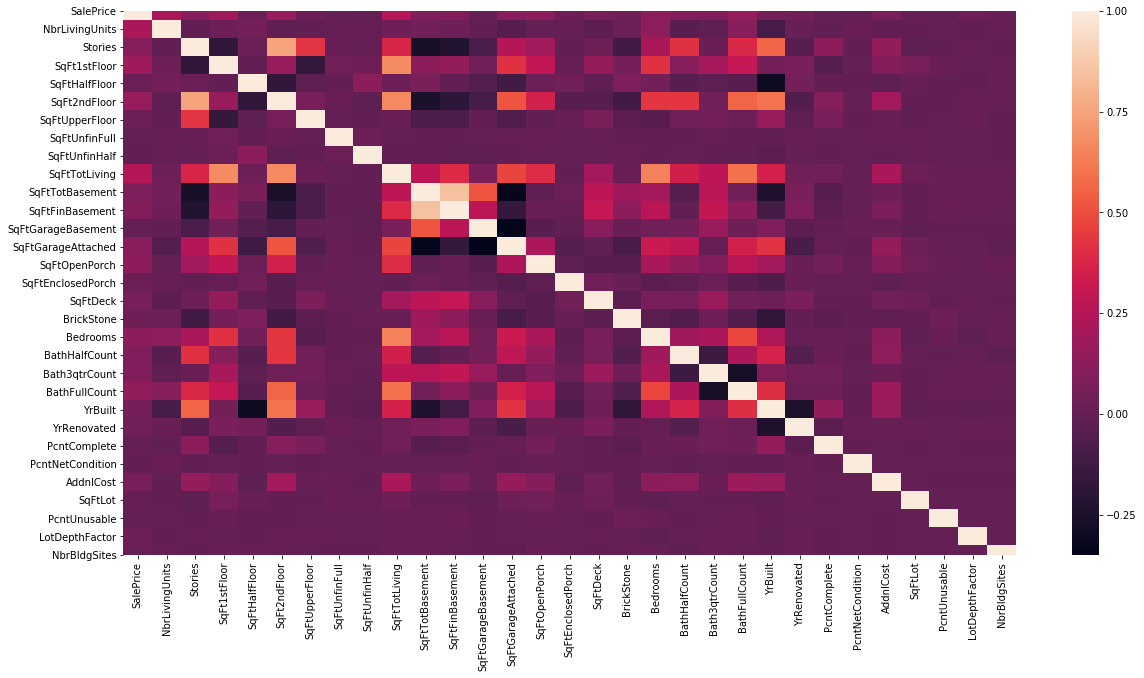

In [109]:
fig, ax = plt.subplots(figsize=(20,10))

sns.heatmap(corr, ax=ax);

In [110]:
corr[corr > 0.7]

SalePrice  NbrLivingUnits   Stories  SqFt1stFloor  \
SalePrice                 1.0             NaN       NaN           NaN   
NbrLivingUnits            NaN             1.0       NaN           NaN   
Stories                   NaN             NaN  1.000000           NaN   
SqFt1stFloor              NaN             NaN       NaN           1.0   
SqFtHalfFloor             NaN             NaN       NaN           NaN   
SqFt2ndFloor              NaN             NaN  0.752894           NaN   
SqFtUpperFloor            NaN             NaN       NaN           NaN   
SqFtUnfinFull             NaN             NaN       NaN           NaN   
SqFtUnfinHalf             NaN             NaN       NaN           NaN   
SqFtTotLiving             NaN             NaN       NaN           NaN   
SqFtTotBasement           NaN             NaN       NaN           NaN   
SqFtFinBasement           NaN             NaN       NaN           NaN   
SqFtGarageBasement        NaN             NaN       NaN           NaN   
SqFtGarageAttached        NaN             NaN       NaN           NaN   
SqFtOpenPorch             NaN             NaN       NaN           NaN   
SqFtEnclosedPorch         NaN             NaN       NaN           NaN   
SqFtDeck                  NaN             NaN       NaN           NaN   
BrickStone                NaN             NaN       NaN           NaN   
Bedrooms                  NaN             NaN       NaN           NaN   
BathHalfCount             NaN             NaN       NaN           NaN   
Bath3qtrCount             NaN             NaN       NaN           NaN   
BathFullCount             NaN             NaN       NaN           NaN   
YrBuilt                   NaN             NaN       NaN           NaN   
YrRenovated               NaN             NaN       NaN           NaN   
PcntComplete              NaN             NaN       NaN           NaN   
PcntNetCondition          NaN             NaN       NaN           NaN   
AddnlCost                 NaN             NaN       NaN           NaN   
SqFtLot                   NaN             NaN       NaN           NaN   
PcntUnusable              NaN             NaN       NaN           NaN   
LotDepthFactor            NaN             NaN       NaN           NaN   
NbrBldgSites              NaN             NaN       NaN           NaN   

                    SqFtHalfFloor  SqFt2ndFloor  SqFtUpperFloor  \
SalePrice                     NaN           NaN             NaN   
NbrLivingUnits                NaN           NaN             NaN   
Stories                       NaN      0.752894             NaN   
SqFt1stFloor                  NaN           NaN             NaN   
SqFtHalfFloor                 1.0           NaN             NaN   
SqFt2ndFloor                  NaN      1.000000             NaN   
SqFtUpperFloor                NaN           NaN             1.0   
SqFtUnfinFull                 NaN           NaN             NaN   
SqFtUnfinHalf                 NaN           NaN             NaN   
SqFtTotLiving                 NaN           NaN             NaN   
SqFtTotBasement               NaN           NaN             NaN   
SqFtFinBasement               NaN           NaN             NaN   
SqFtGarageBasement            NaN           NaN             NaN   
SqFtGarageAttached            NaN           NaN             NaN   
SqFtOpenPorch                 NaN           NaN             NaN   
SqFtEnclosedPorch             NaN           NaN             NaN   
SqFtDeck                      NaN           NaN             NaN   
BrickStone                    NaN           NaN             NaN   
Bedrooms                      NaN           NaN             NaN   
BathHalfCount                 NaN           NaN             NaN   
Bath3qtrCount                 NaN           NaN             NaN   
BathFullCount                 NaN           NaN             NaN   
YrBuilt                       NaN           NaN             NaN   
YrRenovated                   NaN           NaN             NaN   
PcntComp

In [111]:
numerics = [c for c in df.columns if (df[c].dtype == 'int64') | (df[c].dtype == 'float64')]

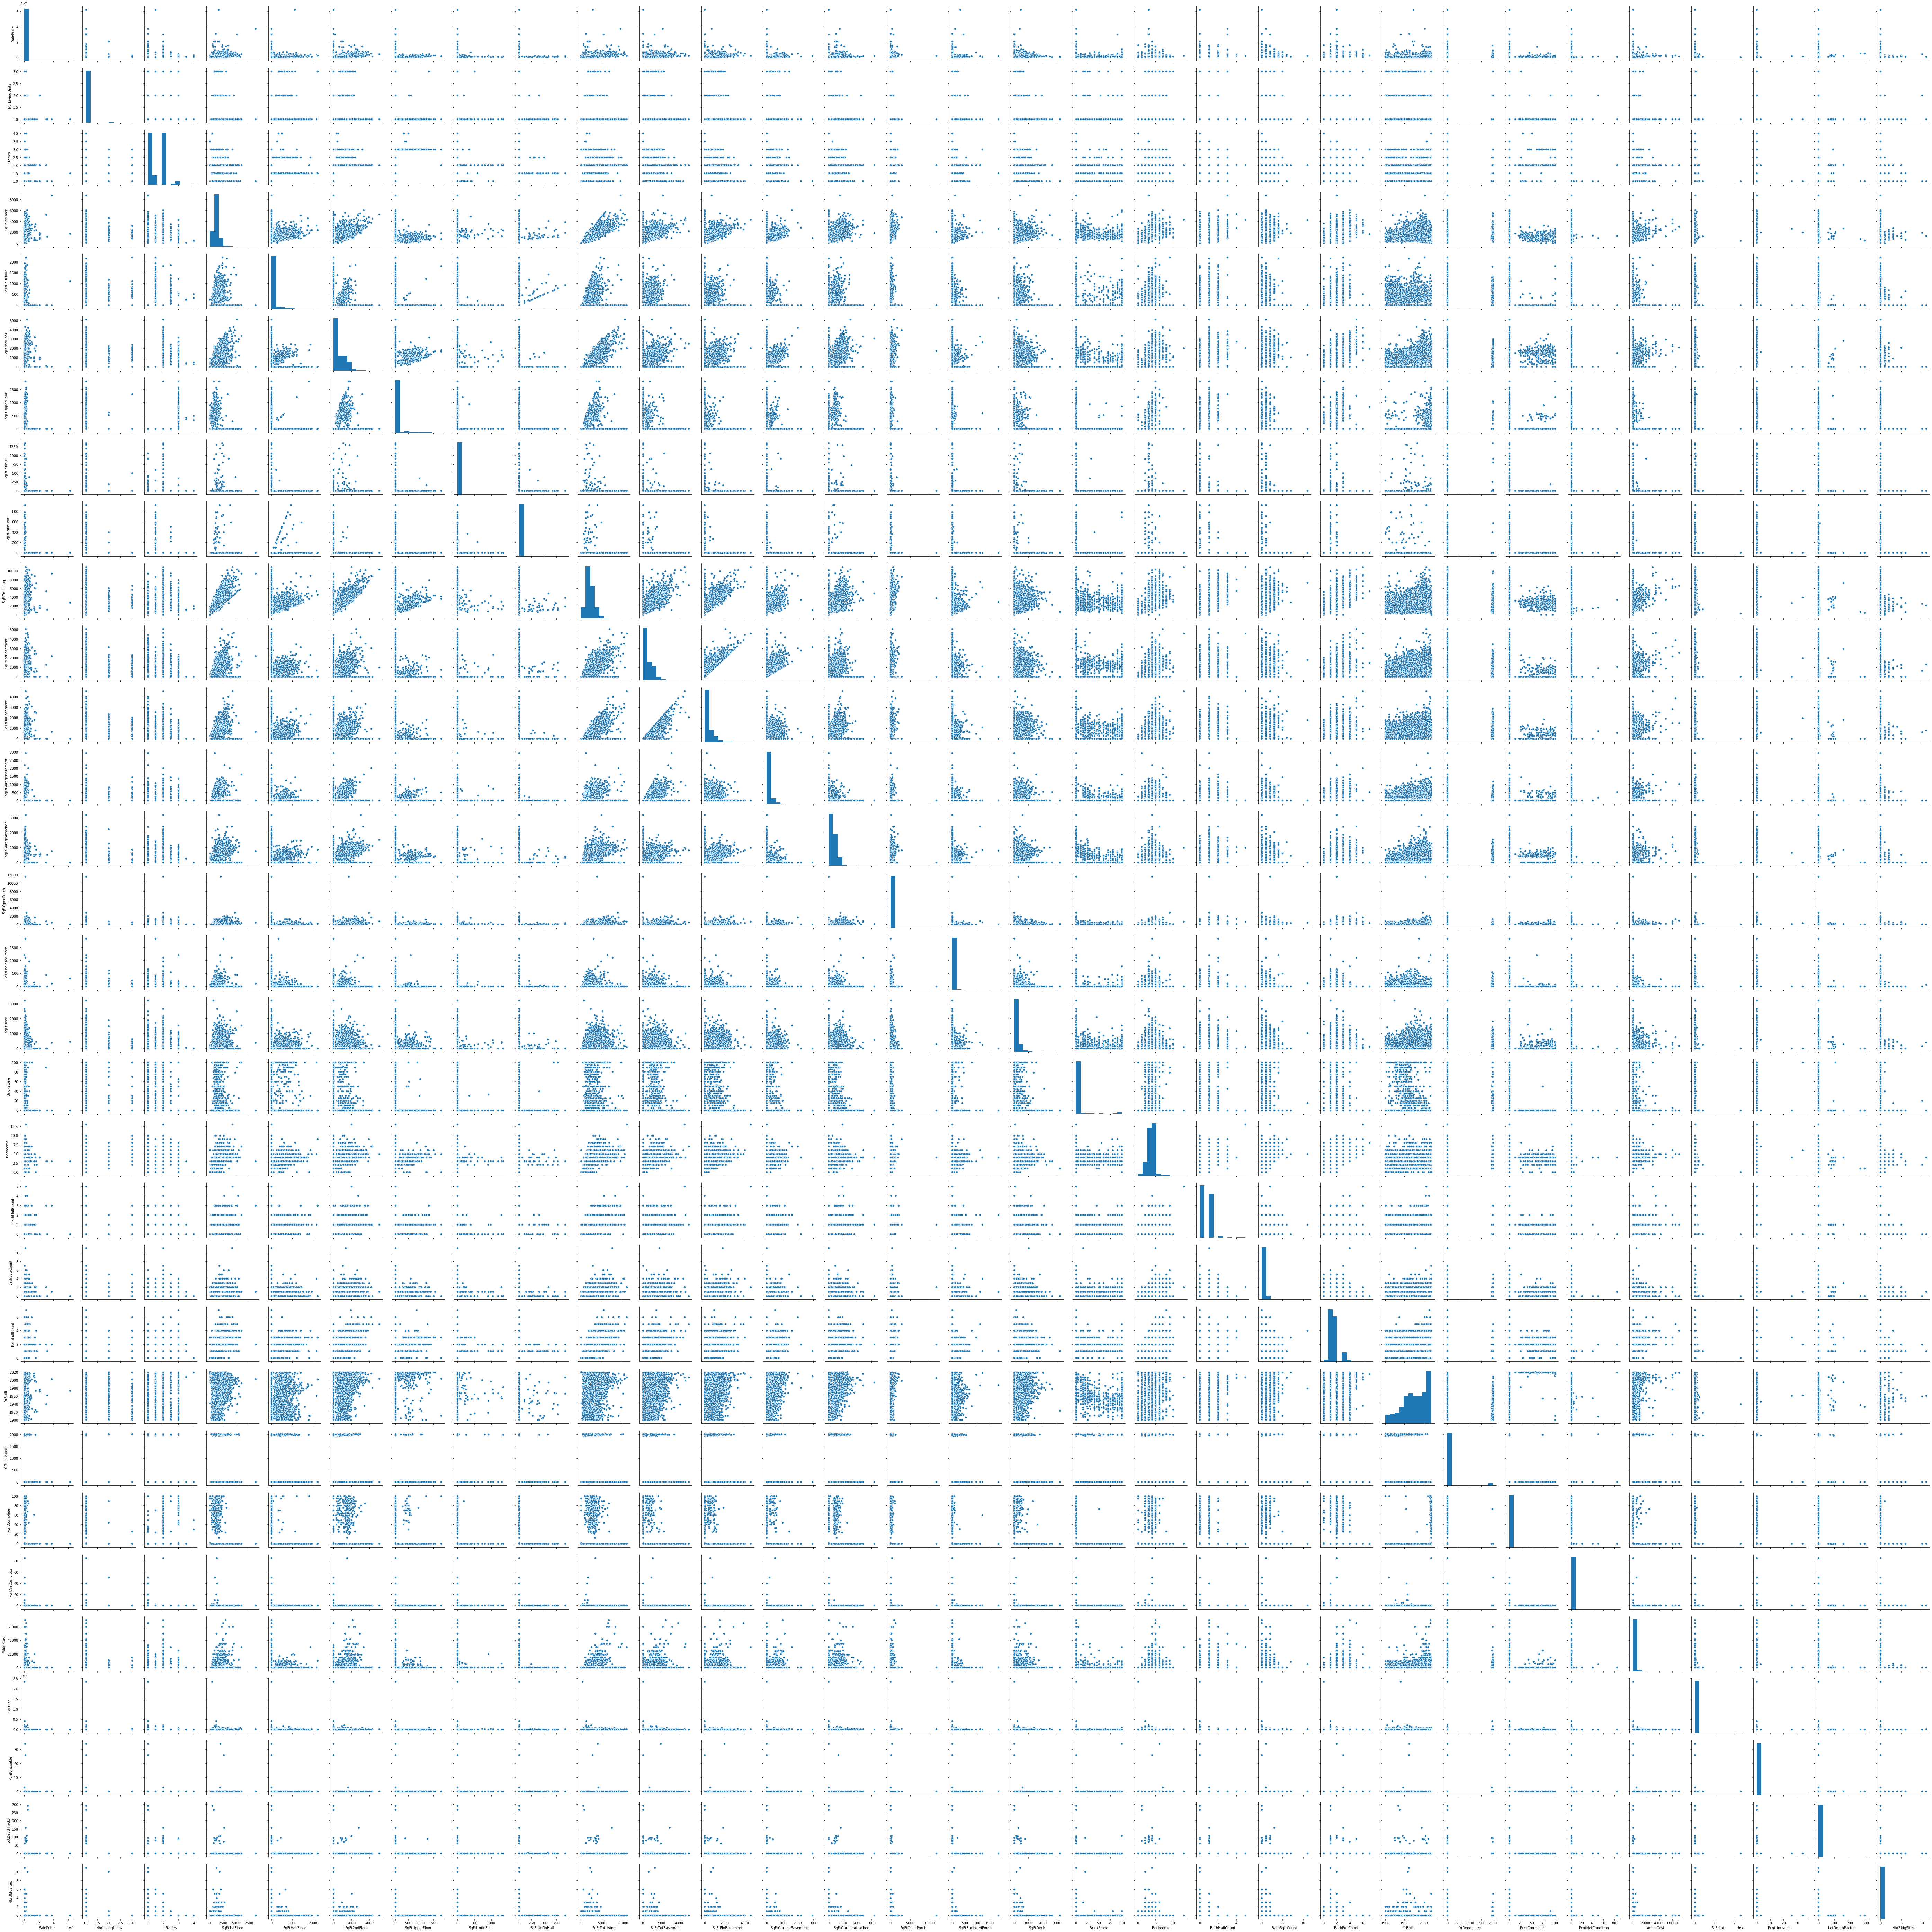

In [112]:
sns.pairplot(df[numerics]);

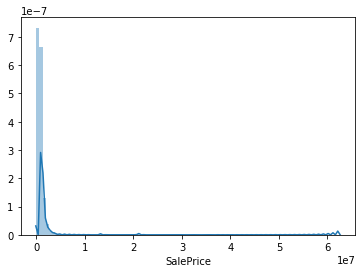

In [113]:
sns.distplot(df.SalePrice, bins=100);

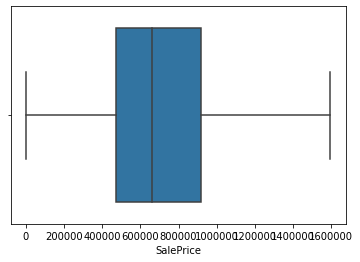

In [114]:
sns.boxplot(df.SalePrice, showfliers=False);

IndexError: index 2 is out of bounds for axis 0 with size 2

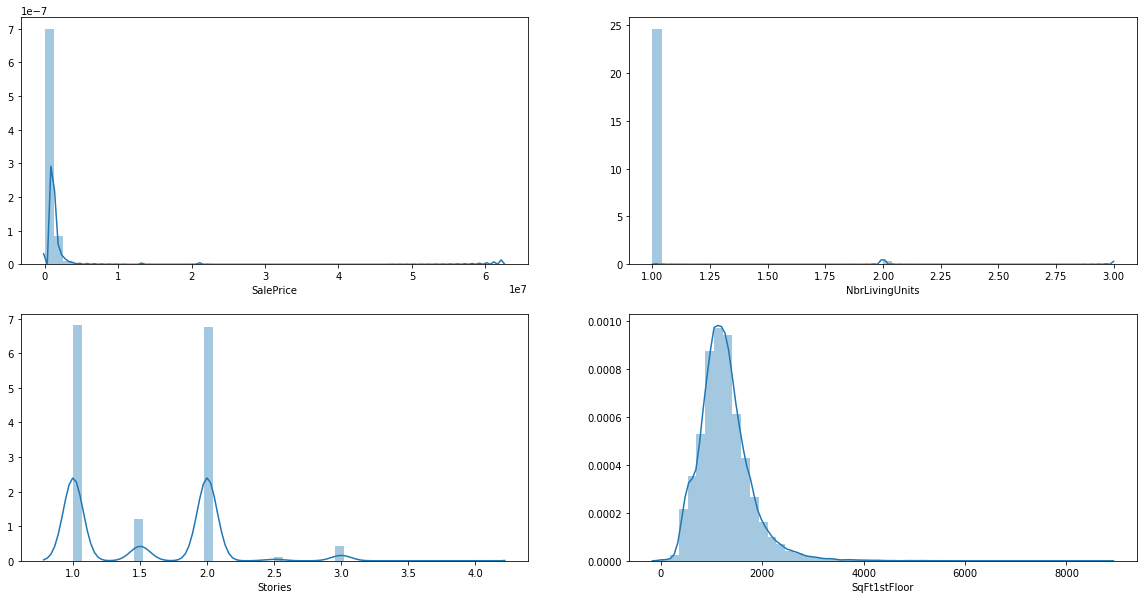

In [115]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

for idx, c in enumerate(numerics):
    ax = axes[idx // 2][idx % 2]
    sns.distplot(df[c], ax=ax)
    
fig.show();

These plots don't look too "normal" --> probably need to remove outliers first

In [ ]:
df[df.SqFtEnclosedPorch > 0].SalePrice.values

In [ ]:
df.SqFtEnclosedPorch.value_counts()

In [ ]:
df.SalePrice.values

In [ ]:
# Create an Array that stores the sale price of the whole population 
population_saleprices = df.SalePrice.values

In [ ]:
# Create another Array that stores the sale price of the houses with Enclosed Porch > 0 (with enlosed porch)
enclosed_porch = df[df.SqFtEnclosedPorch > 0].SalePrice.values

# Create another Array that stores the sale price of the houses with Enclosed Porch == 0 (no enclosed porch) 
no_enclosed_porch = df[df.SqFtEnclosedPorch == 0].SalePrice.values

In [ ]:
# Check variances of the 2 arrays:
print('No Enclosed Porch:', np.var(no_enclosed_porch))
print('Enclosed Porch:', np.var(enclosed_porch))
np.var(enclosed_porch) - np.var(no_enclosed_porch)

In [ ]:
print(len(enclosed_porch), len(no_enclosed_porch))

These 2 arrays have different variances, and both arrays are more than 30 in sizes 
--> I will perform a Welch's t-test

In [ ]:
import scipy.stats as stats
test = stats.ttest_ind(enclosed_porch, no_enclosed_porch, equal_var=False)
test.pvalue/2

H_0: There is no difference in average Sale Price between houses with an enclosed porch versus those that do not have one.

H_1: Houses with enclosed porch have higher average Sale Price than those that don't.

In [ ]:
sns.distplot(enclosed_porch);

In [ ]:
sns.distplot(no_enclosed_porch);

In [ ]:
def remove_outliers(dt, col, method='iqr'):
    """
    Remove outliers of a dataframe based on either IQR or z-score for specified column 
    Input for method argument is either 'iqr' or 'z-score'
    
    """
    if method == 'iqr':
        q1 = dt[col].quantile(0.25)
        q3 = dt[col].quantile(0.75)
        iqr = q3 - q1
        output = dt[(dt[col] > q1 - 1.5 * iqr) & (dt[col] < q3 + 1.5 * iqr)]
    elif method == 'z-score':
        z_scores = stats.zscore(df[col])
        abs_z_scores = np.abs(z_scores)
        output = df[abs_z_scores < 3]
    return output

In [ ]:
# Remove outliers from df.SalePrice using z-score
df_wo = remove_outliers(df, 'SalePrice', 'z-score')
df_wo.info()

In [ ]:
df_wo.SalePrice.describe()

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(df_wo.SalePrice, ax=ax);

In [ ]:
sns.distplot(df_wo.SalePrice);

In [ ]:
def separate(dt, col, val, threshold=0):
    """
    Separate dataframe 'dt' based threshold value 'threshold' for column 'col'
    Collect 'df[val]' into 2 different arrays
    """
    gt = dt[dt[col] > threshold][val].values
    le = dt[dt[col] <= threshold][val].values
    
    return gt, le

In [ ]:
enclosed_porch, no_enclosed_porch = separate(df_wo, 'SqFtEnclosedPorch', 'SalePrice')

In [ ]:
print(np.var(enclosed_porch), np.var(no_enclosed_porch))
print(len(enclosed_porch), len(no_enclosed_porch))

In [ ]:
fig, ax = plt.subplots(figsize=(20,7))

sns.distplot(enclosed_porch, ax=ax, color='blue', label=f'With Enclosed Porch: {np.mean(enclosed_porch)}')
sns.distplot(no_enclosed_porch, ax=ax, color='red', label=f'Without Enclosed Porch: {np.mean(no_enclosed_porch)}')
ax.legend()
fig.show();

Run Welch's t-test again on filtered data (without outliers)

In [ ]:
test = stats.ttest_ind(enclosed_porch, no_enclosed_porch, equal_var=False)

In [ ]:
test.pvalue/2

In [ ]:
np.mean(enclosed_porch) > np.mean(no_enclosed_porch)

In [ ]:
df_wo2 = remove_outliers(df, 'SalePrice')
enclosed_porch2, no_enclosed_porch2 = separate(df_wo2, 'SqFtEnclosedPorch', 'SalePrice')
test = stats.ttest_ind(enclosed_porch2, no_enclosed_porch2, equal_var=False)

In [ ]:
test.pvalue/2

In [ ]:
fig, ax = plt.subplots(figsize=(20,7))

sns.distplot(enclosed_porch2, ax=ax, color='blue', label=f'With Enclosed Porch: {np.mean(enclosed_porch2)}')
sns.distplot(no_enclosed_porch2, ax=ax, color='red', label=f'Without Enclosed Porch: {np.mean(no_enclosed_porch2)}')
ax.legend()
fig.show();

### Home Improvement

Identifying columns that might potentially be related to "Home Improvement Projects"

In [ ]:
for c in df.columns:
    print(c)

In [ ]:
home_improv_features = []

In [ ]:
df.OtherProblems.value_counts()

In [ ]:
lookup(16)

In [ ]:
df.BldgGradeVar.value_counts()

In [ ]:
lookup(82)

Initial manual exploratory analysis of column names and values --> I've identified the followings as potentially related to home improvement projects.

- SalePrice
- Stories
- BldgGrade
- sqft_cols
- FinBasementGrade
- DaylightBasement
- HeatSystem
- HeatSource
- BrickStone
- Bedrooms
- BathHalfCount
- Bath3qtrCount
- BathFullCount
- FpSingleStory
- FpFreestanding
- FpAdditional
- YrBuilt
- YrRenovated
- PcntComplete
- Obsolescence
- PcntNetCondition
- AddnlCost
- WaterSystem
- SewerSystem
- InadequateParking
- RestrictiveSzShape
- PcntUnusable
- LotDepthFactor
- TrafficNoise
- AirportNoise
- WaterProblems

In [ ]:
home_imprv_features = ['SalePrice', 'Stories', 'BldgGrade'] \
                    + sqft_cols \
                    + ['FinBasementGrade', 'DaylightBasement', 'HeatSystem', 'HeatSource', 'BrickStone', 'Bedrooms',
                      'BathHalfCount', 'Bath3qtrCount', 'BathFullCount', 'FpSingleStory', 'FpFreestanding',
                      'FpAdditional', 'YrBuilt', 'YrRenovated', 'PcntComplete', 'Obsolescence', 'PcntNetCondition',
                      'AddnlCost', 'WaterSystem', 'SewerSystem', 'InadequateParking', 'RestrictiveSzShape', 
                      'PcntUnusable', 'LotDepthFactor', 'TrafficNoise', 'AirportNoise', 'WaterProblems']

In [ ]:
len(home_imprv_features)

In [ ]:
hi_df = df[home_imprv_features]

In [ ]:
hi_df.info()

In [ ]:
hi_df.InadequateParking.value_counts()

In [ ]:
for c in 

In [ ]:
lookup(84)